In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing necessary liabraries

In [4]:
df = pd.read_csv("Flight_data.csv")
df.head()

,Unnamed: 0,Flight Name,Departure time,Arrival time,Source,Destination,No of Stop,Duration,Date of Journey,Price
0,5205,Air India,23:00,07:50+1D,Goa In,Hyderabad,2 Stops,32h 50m,10 Feb 22,5368
1,3707,Vistara,09:30,16:55,Delhi,Kolkata,1 Stop,7h 25m,10 Feb 22,12988
2,887,Go First,16:45,02:40+1D,Bengaluru,Ahmedabad,1 Stop,9h 55m,10 Feb 22,4100
3,2390,Air India,07:35,12:05+1D,Bengaluru,Pune,3 Stops,28h 30m,10 Feb 22,5530
4,4716,AirAsia I.,09:00,11:40,Chennai,Jaipur,Non Stop,2h 40m,10 Feb 22,7351


read the csv file and checked first five rows

In [18]:
df.drop('Unnamed: 0',axis = 1,inplace = True)
df.head()

,Flight Name,Source,Destination,Date of Journey,duration_Hour,duration_Minute,Fare,day,Stops,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,Air India,Goa In,Hyderabad,10 Feb 22,32,50,5368,1,2,23,0,50,0
1,Vistara,Delhi,Kolkata,10 Feb 22,7,25,12988,0,1,9,30,55,0
2,Go First,Bengaluru,Ahmedabad,10 Feb 22,9,55,4100,1,1,16,45,40,0
3,Air India,Bengaluru,Pune,10 Feb 22,28,30,5530,1,3,7,35,5,0
4,AirAsia I.,Chennai,Jaipur,10 Feb 22,2,40,7351,0,0,9,0,40,0


dropped the unnecessary column

In [5]:
demo = []
demo2 = []
No_of_stops = []
for i in df['No of Stop']:
    demo.append(i.split('-')[0])   

for i in demo:
    demo2.append(i.split()[0])
    
for i in demo2:
    No_of_stops.append((i.replace('Non','0')))
    
df['No_of_stops'] = No_of_stops
df.drop('No of Stop',axis = 1,inplace = True)
df.head()

,Unnamed: 0,Flight Name,Departure time,Arrival time,Source,Destination,Duration,Date of Journey,Price,No_of_stops
0,5205,Air India,23:00,07:50+1D,Goa In,Hyderabad,32h 50m,10 Feb 22,5368,2
1,3707,Vistara,09:30,16:55,Delhi,Kolkata,7h 25m,10 Feb 22,12988,1
2,887,Go First,16:45,02:40+1D,Bengaluru,Ahmedabad,9h 55m,10 Feb 22,4100,1
3,2390,Air India,07:35,12:05+1D,Bengaluru,Pune,28h 30m,10 Feb 22,5530,3
4,4716,AirAsia I.,09:00,11:40,Chennai,Jaipur,2h 40m,10 Feb 22,7351,0


cleaned the number of stops column and created a new column and also deleted the original column

In [6]:
hour = []
minute = []
for i in df['Duration']:
    hour.append(i.split()[0].replace('h',''))
    minute.append(i.split()[-1].replace('m',''))
    
df['duration_Hour'] = hour
df['duration_Minute'] = minute
df.drop('Duration',axis = 1,inplace = True)
df.head()

,Unnamed: 0,Flight Name,Departure time,Arrival time,Source,Destination,Date of Journey,Price,No_of_stops,duration_Hour,duration_Minute
0,5205,Air India,23:00,07:50+1D,Goa In,Hyderabad,10 Feb 22,5368,2,32,50
1,3707,Vistara,09:30,16:55,Delhi,Kolkata,10 Feb 22,12988,1,7,25
2,887,Go First,16:45,02:40+1D,Bengaluru,Ahmedabad,10 Feb 22,4100,1,9,55
3,2390,Air India,07:35,12:05+1D,Bengaluru,Pune,10 Feb 22,5530,3,28,30
4,4716,AirAsia I.,09:00,11:40,Chennai,Jaipur,10 Feb 22,7351,0,2,40


created duration hour and duration minute column from the existing column named Duration of a flight and deleted the original column

In [7]:
Arrival_time = []
day = []
for i in df['Arrival time']:
    Arrival_time.append(i.split('+')[0])
    day.append(i.split('+')[-1])
day2 = []
for i in day:
    if i == '1D':
        day2.append('1D')
    else:
        day2.append('0')
        
df['Arrival_time'] = Arrival_time
df['Day'] = day2
df.drop('Arrival time',axis = 1,inplace = True)

In [8]:
df.head()

,Unnamed: 0,Flight Name,Departure time,Source,Destination,Date of Journey,Price,No_of_stops,duration_Hour,duration_Minute,Arrival_time,Day
0,5205,Air India,23:00,Goa In,Hyderabad,10 Feb 22,5368,2,32,50,07:50,1D
1,3707,Vistara,09:30,Delhi,Kolkata,10 Feb 22,12988,1,7,25,16:55,0
2,887,Go First,16:45,Bengaluru,Ahmedabad,10 Feb 22,4100,1,9,55,02:40,1D
3,2390,Air India,07:35,Bengaluru,Pune,10 Feb 22,5530,3,28,30,12:05,1D
4,4716,AirAsia I.,09:00,Chennai,Jaipur,10 Feb 22,7351,0,2,40,11:40,0


created two new columns arrival time and number of days from the existing column Arrival time

In [9]:
df.columns

Index(['Unnamed: 0', 'Flight Name', 'Departure time', 'Source', 'Destination',
       'Date of Journey', 'Price', 'No_of_stops', 'duration_Hour',
       'duration_Minute', 'Arrival_time', 'Day'],
      dtype='object')

checked the number of columns in a dataframe

In [10]:
df.dtypes

Unnamed: 0          int64
Flight Name        object
Departure time     object
Source             object
Destination        object
Date of Journey    object
Price              object
No_of_stops        object
duration_Hour      object
duration_Minute    object
Arrival_time       object
Day                object
dtype: object

checked the datatypes of every column

In [11]:
Fare = []
for i in df['Price']:
    Fare.append(i.replace(',',''))
df.drop('Price',axis = 1,inplace = True)
df['Fare'] = Fare
df['Fare'] = df['Fare'].astype(str).astype(int)
    

replaced comma from a fare column and converted to string and then to integer

In [12]:
day = []
for i in df['Day']:
    day.append(i.replace('D',''))
df['day'] = day
df.drop('Day',axis = 1,inplace = True)
df['day'] = df['day'].astype(str).astype(int)

replaced D string from a day column and also converted the column into integer

In [13]:
df['duration_Hour'] = df['duration_Hour'].astype(str).astype(int)
df['duration_Minute'] = df['duration_Minute'].astype(str).astype(int)

converted both duration hour and duration minute column into integer type

In [14]:
stops = []
for i in df['No_of_stops']:
    if i == '2+':
        stops.append('4')
    else:
        stops.append(i)
df['Stops'] = stops
df.drop('No_of_stops',axis = 1,inplace = True)
df['Stops'] = df['Stops'].astype(str).astype(int)

replaced 2+ from No of stops column into 4 so that we dont get any error duraing the model deployement

In [55]:
df.describe()

,duration_Hour,duration_Minute,Fare,day,Stops
count,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000
mean,17.014471,26.613915,7453.915584,0.596104,1.441187
std,10.366061,17.180538,3874.909118,0.490700,0.810779
min,0.000000,0.000000,1104.000000,0.000000,0.000000
25%,8.000000,10.000000,4698.000000,0.000000,1.000000
50%,16.000000,25.000000,6462.000000,1.000000,1.000000
75%,25.000000,40.000000,9838.000000,1.000000,2.000000
max,51.000000,59.000000,35830.000000,1.000000,5.000000


checked the necessary statistical measures across the column

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10780 entries, 0 to 10779
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Flight Name      10780 non-null  object
 1   Departure time   10780 non-null  object
 2   Source           10780 non-null  object
 3   Destination      10780 non-null  object
 4   Date of Journey  10780 non-null  object
 5   duration_Hour    10780 non-null  int32 
 6   duration_Minute  10780 non-null  int32 
 7   Arrival_time     10780 non-null  object
 8   Fare             10780 non-null  int32 
 9   day              10780 non-null  int32 
 10  Stops            10780 non-null  int32 
dtypes: int32(5), object(6)
memory usage: 716.0+ KB


the above data shows that the data frame have 6-object type data,5-integer type data

In [57]:
df.isnull().sum()

Flight Name        0
Departure time     0
Source             0
Destination        0
Date of Journey    0
duration_Hour      0
duration_Minute    0
Arrival_time       0
Fare               0
day                0
Stops              0
dtype: int64

checked the number of null values acrosss the column

In [15]:
df['Departure_Hour'] = pd.to_datetime(df['Departure time'], format='%M:%S').dt.minute
df['Departure_Min'] = pd.to_datetime(df['Departure time'], format='%M:%S').dt.second
df.drop('Departure time',axis = 1,inplace = True)

created new column as departure minute and departure sec from the departure time column and converted both to datetime format.

In [16]:
df['Arrival_time'] = pd.to_datetime(df['Arrival_time'])
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_time'], format='%M:%S').dt.minute
df['Arrival_Min'] = pd.to_datetime(df['Arrival_time'], format='%M:%S').dt.second
df.drop('Arrival_time',axis = 1,inplace =True)

created new column as arrival minute and arrival second column from the arrival time column and converted both into datetime format.

In [60]:
df.dtypes

Flight Name        object
Source             object
Destination        object
Date of Journey    object
duration_Hour       int32
duration_Minute     int32
Fare                int32
day                 int32
Stops               int32
Departure_Hour      int64
Departure_Min       int64
Arrival_Hour        int64
Arrival_Min         int64
dtype: object

## Visualization

<AxesSubplot:xlabel='Flight Name', ylabel='Date of Journey'>

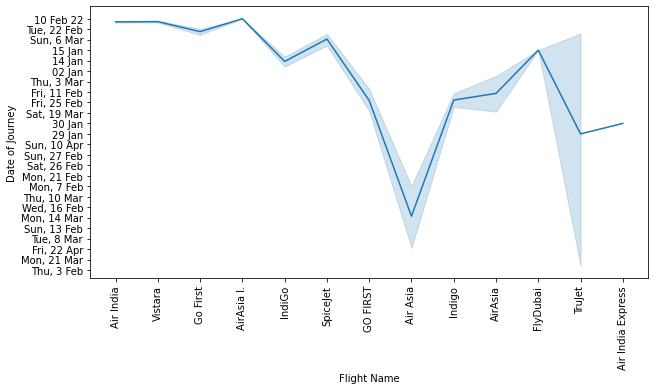

In [121]:
plt.figure(figsize = (10,5))
plt.xticks(rotation=90)
sns.lineplot(x = 'Flight Name',y = 'Date of Journey',data = df)
plt.show()

The above graph shows that the which flight is availabel on which date.

In [61]:
df.head()

,Flight Name,Source,Destination,Date of Journey,duration_Hour,duration_Minute,Fare,day,Stops,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,Air India,Goa In,Hyderabad,10 Feb 22,32,50,5368,1,2,23,0,50,0
1,Vistara,Delhi,Kolkata,10 Feb 22,7,25,12988,0,1,9,30,55,0
2,Go First,Bengaluru,Ahmedabad,10 Feb 22,9,55,4100,1,1,16,45,40,0
3,Air India,Bengaluru,Pune,10 Feb 22,28,30,5530,1,3,7,35,5,0
4,AirAsia I.,Chennai,Jaipur,10 Feb 22,2,40,7351,0,0,9,0,40,0


In [66]:
categorical = ['Flight Name','Source','Destination']
numerical = ['Departure_Hour','Departure_Min','duration_Hour','duration_Minute','Arrival_Hour','Fare','day','Stops','Arrival_Min']

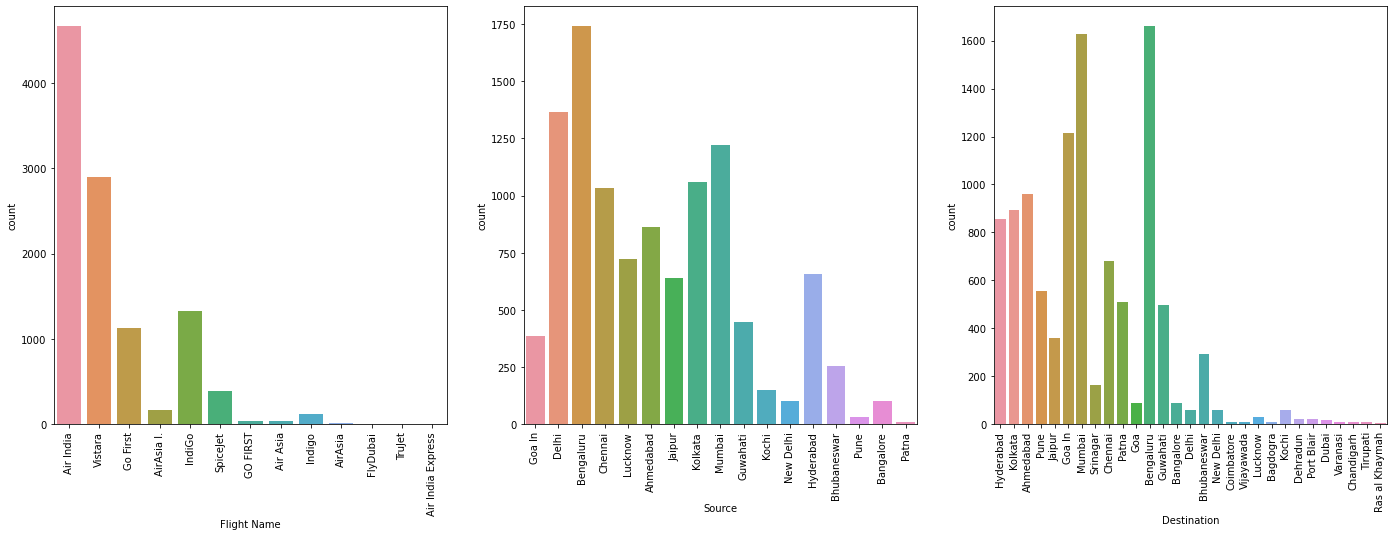

In [20]:
c = 1
plt.figure(figsize=(20,45))
for i in categorical:
    plt.subplot(6,3,c)
    sns.countplot(df[i])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad=3.0)
    c = c+1
plt.show()


From the above graph we could conclude that:
* Airlines:-
* Air india is the most preferred airline with the highest row count, followed by Vistara and indigo.
* Count for AirAsia, Gofirst, spicejet and flydubai is quite low.

 source:-
* Most of the flights takeoff from bangaluru.
* patna has the minimum number of flights

 Destination:
* most of the flights destination is bangaluru.
* Ras al Khayumah has least number of flight destination.

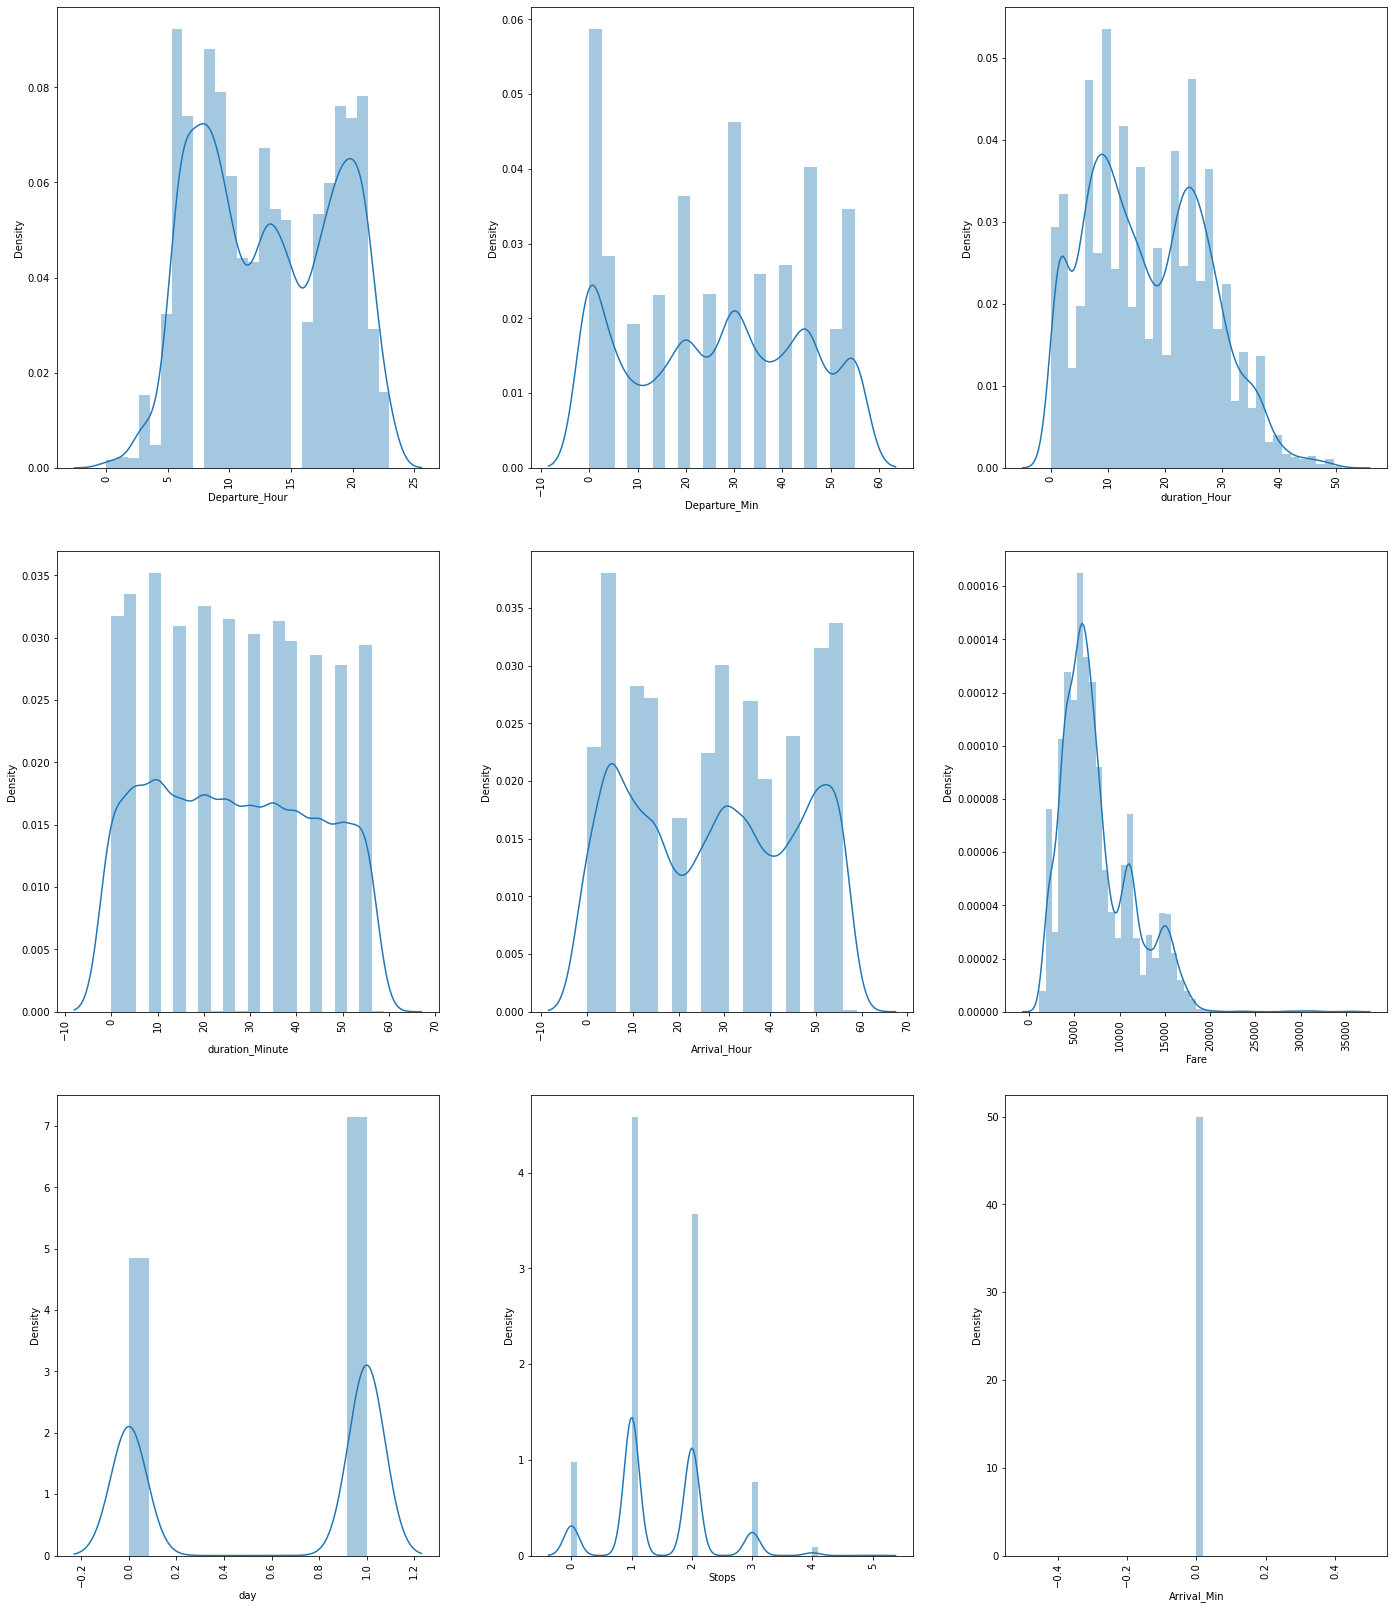

In [67]:
c = 1
plt.figure(figsize=(20,45))
for i in numerical:
    plt.subplot(6,3,c)
    sns.distplot(df[i])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad=3.0)
    c = c+1
plt.show()

We make the below observations from the numerical data –

Total stops:-
* Majority of the flights have stops as 1, flights with 3 and 4 stops are quite low


​Departure_hour:-
* Majority of the flights tend to fly in the early morning time
* Count of flights taking off during 5:00 - 10:00 is also high, Afternoon flights are less in number.

​Departure_minute:-
* Most flights take off at whole hours (Mins as 00)

​Arrival time hour:-
* Majority of the flights reach its destination in the evening time around 18:00-19:00
* This seems to be because majority of the flights have take-off times in the morning and hence land after in the evening

Arrival time minute:-
* This distribution is similar and does not give out any dedicated information

Travel hours:-
* Majority of the flights have travel time for around 10-15 hours,these are international flights
* Some flights have time around 30 hours too, this could be because of the number of stops in between

Travel mins:-
* The data is divided and is not pointing towards any specific points

<AxesSubplot:xlabel='Date of Journey', ylabel='duration_Minute'>

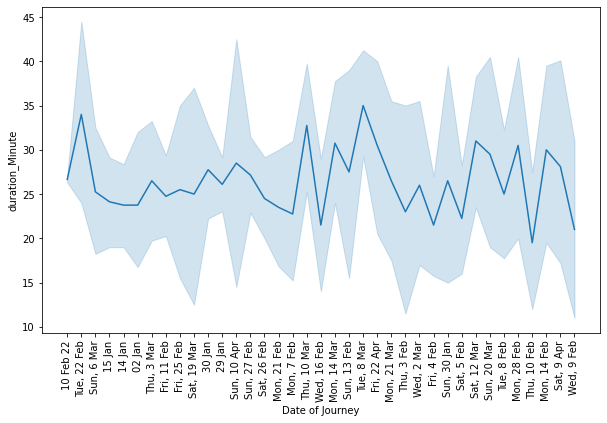

In [165]:
plt.figure(figsize = (12,6))
plt.xticks(rotation=90)
sns.lineplot(x = 'Date of Journey',y = 'duration_Minute',data = df)
plt.show()

from the above graph we can see that duration of a flight has no relation to date of journey. they dont show any trend

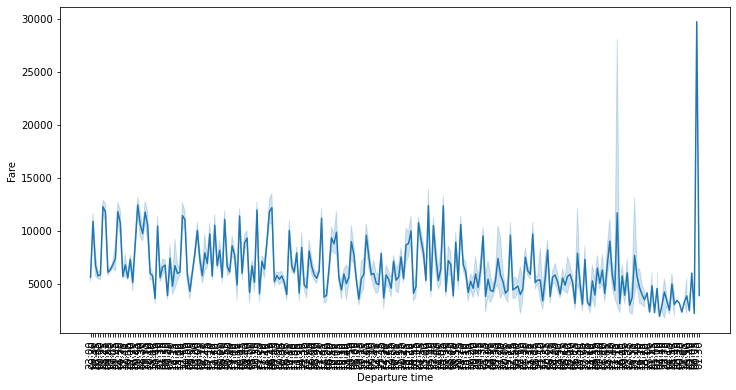

In [20]:
plt.figure(figsize = (12,6))
plt.xticks(rotation=90)
sns.lineplot(x = 'Departure time',y = 'Fare',data = df)
plt.show()

from the above graph we can see that fare decreses as we go near to departure date

<AxesSubplot:xlabel='Flight Name', ylabel='Stops'>

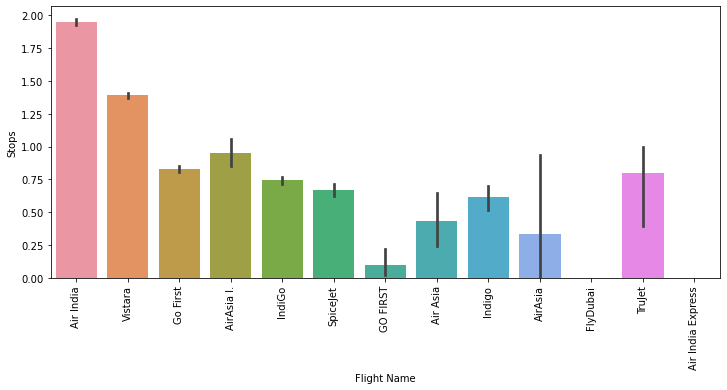

In [171]:
plt.figure(figsize = (12,5))
plt.xticks(rotation=90)
sns.barplot(x = 'Flight Name',y = 'Stops',data = df)
plt.show()

from the above graph we can see that:-
* Air india has the maximum number of stops between the source and destination.
* Go first has the least number of stops between the source and destination.

<AxesSubplot:xlabel='Date of Journey', ylabel='Fare'>

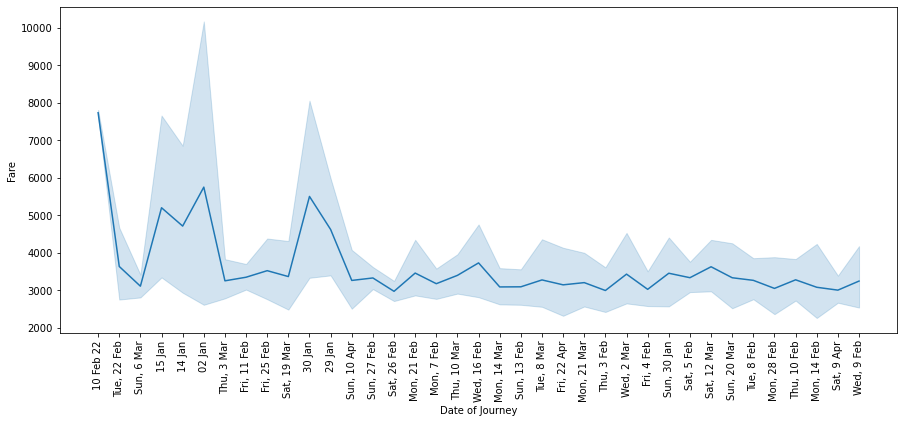

In [173]:
plt.figure(figsize = (15,6))
plt.xticks(rotation=90)
sns.lineplot(x = 'Date of Journey',y = 'Fare',data = df)
plt.show()

from the above graph we can observe that the price of flight decreases according to the date of journey. as the date crosses by the fare decreses.

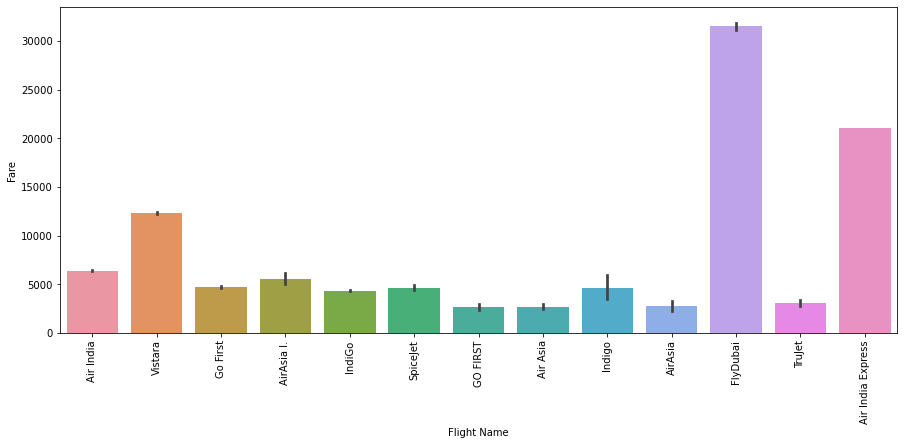

In [181]:
plt.figure(figsize = (15,6))
plt.xticks(rotation=90)
sns.barplot(x = 'Flight Name',y = 'Fare',data = df)
plt.show()

from the above graph we could observe that:
* Flydubai has the maximum number of Fare.
* Go first, AirAsia,Trujet has the minimum Fares
* indigo is expensive then jet airways.

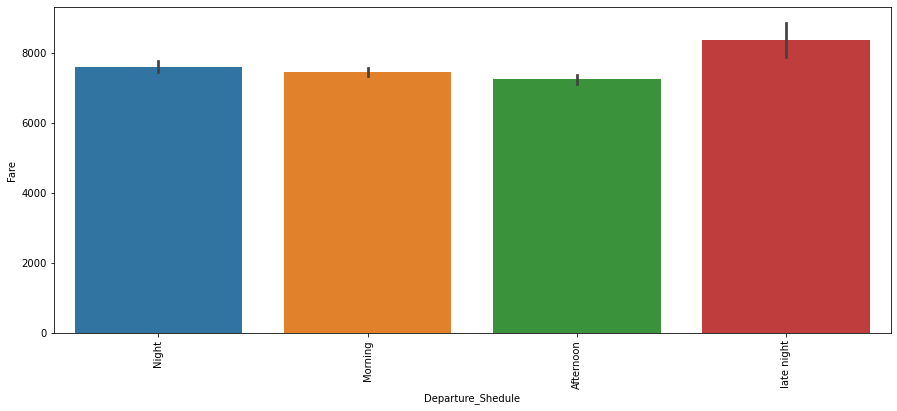

In [73]:
shedule = []
for i in df['Departure_Hour']:
    if i < 12:
        shedule.append('Morning')
    elif (i > 12) and (i<= 18):
        shedule.append('Afternoon')
    elif (i> 18) and (i<= 24):
        shedule.append('Night')
    else:
        shedule.append("late night")

df['Departure_Shedule'] = shedule

plt.figure(figsize = (15,6))
plt.xticks(rotation=90)
sns.barplot(x = 'Departure_Shedule',y = 'Fare',data = df)
plt.show()     

From the above graph we could observe that night and late night flights are expensive as compared to morning afternoon flights

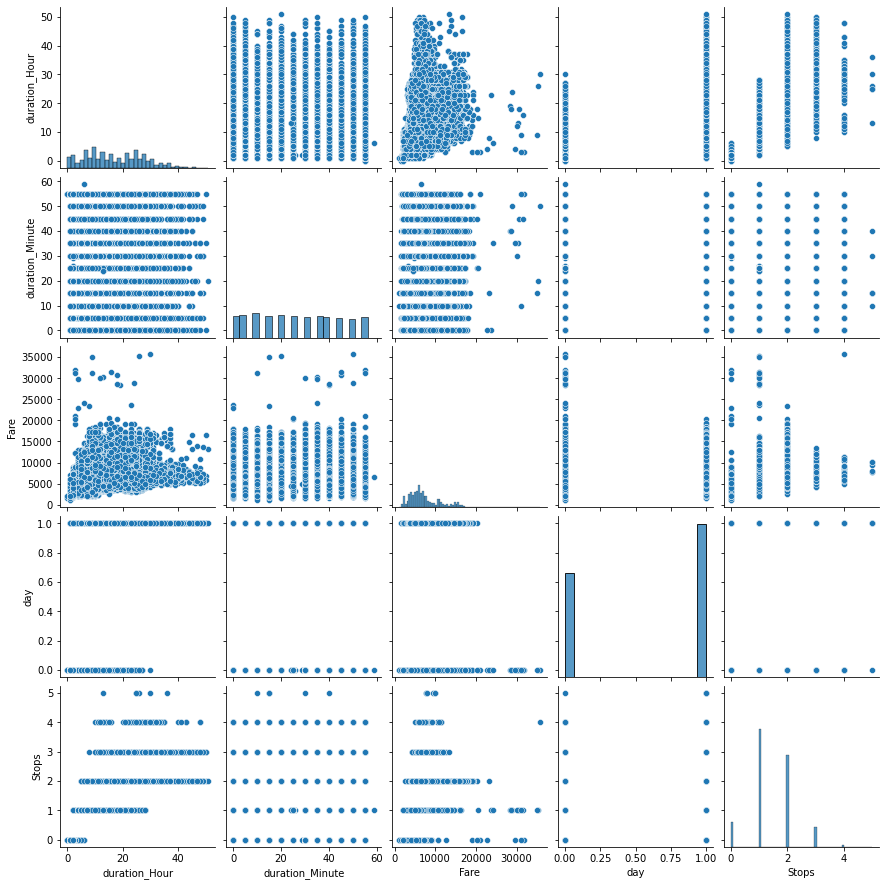

In [207]:
sns.pairplot(df)

pair plot shows the relation between the columns

<AxesSubplot:>

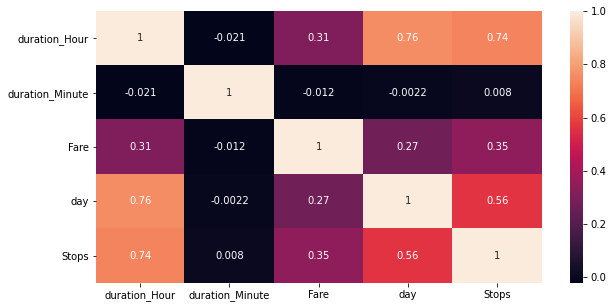

In [216]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot = True)

the above heat shows that no column has the high number of multicolinearity.

## Plotting outliers

duration_Hour         AxesSubplot(0.125,0.536818;0.227941x0.343182)
duration_Minute    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Fare               AxesSubplot(0.672059,0.536818;0.227941x0.343182)
day                      AxesSubplot(0.125,0.125;0.227941x0.343182)
Stops                 AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

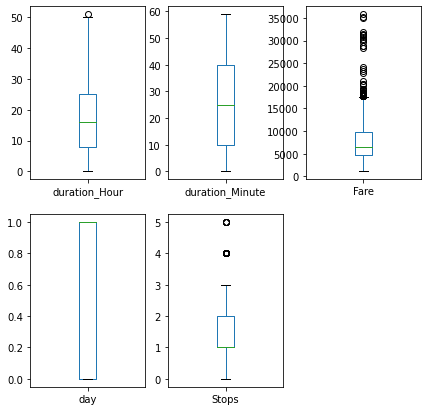

In [218]:
df.plot(kind = 'box',subplots = True,layout=(2,3),figsize = (7,7))

from the above graph we could observe that there is very less amount of outliers.

## Check the distribution of skewness

In [219]:
df.skew()

duration_Hour      0.313470
duration_Minute    0.076247
Fare               1.107522
day               -0.391774
Stops              0.366978
dtype: float64

here we have checked the skewness across the column and found only fare column has the high amout of skewness as compared to the other columns.

## Preprocessing

In [ ]:
df.drop('Departure_Shedule',axis = 1,inplace = True)

droped the original column 

again checked the datatypes across the column now we can see that we have 5- object datatypes and 10 integer datatypes

In [21]:
x = df.drop('Fare',axis = 1)
y = df['Fare']

split the data into x and y

In [22]:
print(x.shape)
print(y.shape)

(10780, 12)
(10780,)


checked the shape of x and y

In [23]:
from sklearn.preprocessing import LabelEncoder

cols = ['Flight Name', 'Source', 'Destination','Date of Journey']
x[cols] = x[cols].apply(LabelEncoder().fit_transform)
x.head()

,Flight Name,Source,Destination,Date of Journey,duration_Hour,duration_Minute,day,Stops,Departure_Min,Departure_Sec,Arrival_Min,Arrival_Sec
0,1,6,14,1,32,50,1,2,23,0,50,0
1,12,5,17,1,7,25,0,1,9,30,55,0
2,7,2,0,1,9,55,1,1,16,45,40,0
3,1,2,23,1,28,30,1,3,7,35,5,0
4,4,4,15,1,2,40,0,0,9,0,40,0


used label encoder to encode the categorical variables into numbers

In [24]:
from sklearn.model_selection import train_test_split
# spliting the data into train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = 0)

split the data into training set and testing set.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

imported the machine learning algorithms and the metrics libraries

In [26]:
lr = LinearRegression()
rfc = RandomForestRegressor()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

model = [lr,rfc,dt,knn]

for i in model:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print('training score: ',i,'is',i.score(x_train,y_train))
    print('testing score: ',i,'is',i.score(x_test,y_test))
    
    # The mean squared error
    print("Mean squared error: ",i,'is',mean_squared_error(y_test,pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: ",i,'is', r2_score(y_test,pred))
    # report performance
    print('Mean Absolute Error : ',i,'is',mean_absolute_error(y_test,pred))
    
    
    print('\n')

training score:  LinearRegression() is 0.6244964246992404
testing score:  LinearRegression() is 0.618550623492424
Mean squared error:  LinearRegression() is 5875713.703755239
Coefficient of determination:  LinearRegression() is 0.618550623492424
Mean Absolute Error :  LinearRegression() is 1772.2750450430424


training score:  RandomForestRegressor() is 0.9819559589272526
testing score:  RandomForestRegressor() is 0.8959302033586334
Mean squared error:  RandomForestRegressor() is 1603055.000040233
Coefficient of determination:  RandomForestRegressor() is 0.8959302033586334
Mean Absolute Error :  RandomForestRegressor() is 578.1155616699521


training score:  DecisionTreeRegressor() is 0.9962765890590491
testing score:  DecisionTreeRegressor() is 0.8315824984334934
Mean squared error:  DecisionTreeRegressor() is 2594244.6962864236
Coefficient of determination:  DecisionTreeRegressor() is 0.8315824984334934
Mean Absolute Error :  DecisionTreeRegressor() is 626.541925081721


training sco

fit the training set and testing set on various machine learning algorithms and checked their accuracy.

In [27]:
# k-fold CV 
from statistics import mean
from numpy import std
from sklearn.model_selection import cross_val_score
for i in model:
    scores = cross_val_score(i, x, y, scoring='r2', cv=10) 
    print('Accuracy of',i,' %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy of LinearRegression()  0.622 (0.025)
Accuracy of RandomForestRegressor()  0.897 (0.029)
Accuracy of DecisionTreeRegressor()  0.831 (0.041)
Accuracy of KNeighborsRegressor()  0.657 (0.025)


here we have validated the above algorithms so that we could get the best working model on the data. here we can see RandomForest is working best on the data so, we move forward with Random forest.

## Hyperparameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                'max_features': ['auto', 'sqrt'],
                'min_samples_split': [2, 5, 10,20,40,60,70,90],
                'n_estimators': [2,5,15,25,35,40,65]}
rfr= RandomForestRegressor()
clf = GridSearchCV(estimator = rfr,param_grid = parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'max_depth': 90,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 65}

used various parameters to fit into random forest regressor to get the best parameter so, that we can boost the accuracy of the choosen model.

In [31]:
rfr2 = RandomForestRegressor(max_depth = 90,
                           max_features = 'auto',
                           min_samples_split = 2,
                           n_estimators = 65) 
rfr2.fit(x_train,y_train)

print(rfr2.score(x_train,y_train))
print(rfr2.score(x_test,y_test))

pred2 = rfr2.predict(x_test)

0.9822911284589508
0.8989583868672154


here we can see that testing score of Random Forest Regressor has increased 

In [33]:
compare = pd.DataFrame({'actual value':y_test,
                       'predicted value':pred2})
compare.head(20)

,actual value,predicted value
10522,13269,13436.338462
6207,5914,7134.746740
9176,11203,11127.400000
9583,2973,4575.738462
5998,3802,5146.723077
6734,14309,14281.292308
4202,6658,7393.242308
8171,5617,5145.015385
8917,6327,5969.123077
486,3821,5348.415385


here is the data of actual and predicted values

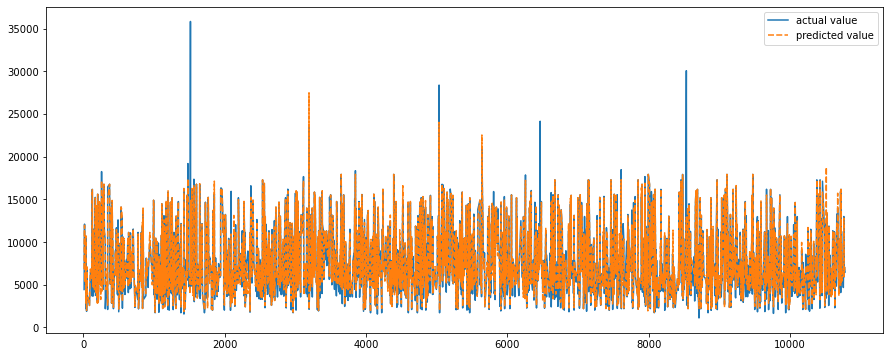

In [34]:
# checking out the differnce between actual and predicted values
plt.figure(figsize=(15,6))
sns.lineplot(data=compare)
  
# displaying the plot
plt.show()

above we see in graph of actual data and the predicted data

## Now we dump the final output

In [ ]:
import pickle
filename = 'Flight_price_predict.pkl'
pickle.dump(rfr22,open(filename,'wb'))